In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"/content/data_all.csv", encoding="latin1")

In [ ]:
print(df.isnull().sum())


id                    0
MonsoonIntensity      0
TopographyDrainage    0
RiverManagement       0
Deforestation         0
                     ..
cnt_14                1
cnt_15                1
mmd2                  1
mac                   1
MAD                   1
Length: 75, dtype: int64


In [ ]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,cnt_9,cnt_10,cnt_11,cnt_12,cnt_13,cnt_14,cnt_15,mmd2,mac,MAD
0,0,0.039335,1.467011,0.020654,1.489348,0.508518,-0.453698,-0.458827,-0.932697,-0.938761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-0.050968,0.674861
1,1,0.525633,0.989450,-0.461971,-0.459918,1.468781,1.489614,-0.938314,0.034964,-0.455784,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,-0.076563,0.902128
2,2,0.525633,0.034328,0.503280,1.002031,-0.931878,1.003786,-1.897287,0.034964,-0.455784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,-0.076563,0.756135
3,3,-0.933262,-0.443233,0.503280,0.027398,-0.451746,1.489614,-0.458827,1.002626,0.510172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.050606,0.646598
4,4,0.039335,-0.920793,-1.427222,0.514715,-0.451746,-0.453698,-0.938314,-0.932697,-0.938761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,-0.000583,0.608820


In [ ]:
print(df.columns.tolist())  # Print column names exactly as they are


['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability', 'type', 'ClimateAnthropogenicInteraction', 'InfrastructurePreventionInteraction', 'sum', 'std', 'mean', 'max', 'min', 'mode', 'median', 'q_25th', 'q_75th', 'skew', 'kurt', 'sum_72_76', '10th', '20th', '30th', '40th', '50th', '60th', '70th', '80th', '90th', 'harmonic', 'geometric', 'zscore', 'cv', 'Skewness_75', 'Skewness_25', '2ndMoment', '3rdMoment', 'entropy', 'rng', 'cnt_0', 'cnt_1', 'cnt_2', 'cnt_3', 'cnt_4', 'cnt_5', 'cnt_6', 'cnt_7', 'cnt_8', 'cnt_9', 'cnt_10', 'cnt_11', 'cnt_12', 'cnt_13', 'cnt_14', 'cnt_15', 'mmd2', 'mac', 'MAD']


# Target variable

In [ ]:

flood_features =[
    "MonsoonIntensity", "TopographyDrainage", "RiverManagement", "Deforestation",
    "Urbanization", "ClimateChange", "DamsQuality", "Siltation", "AgriculturalPractices",
    "Encroachments", "DrainageSystems",
    "CoastalVulnerability", "Landslides", "Watersheds",
    "PopulationScore", "WetlandLoss"
]
df_flood = df[flood_features]

In [ ]:
df_flood.shape

(4021, 16)

In [ ]:
y = df['FloodProbability']

In [ ]:
df_flood.head(6)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,PopulationScore,WetlandLoss
0,0.039335,1.467011,0.020654,1.489348,0.508518,-0.453698,-0.458827,-0.932697,-0.938761,-0.456037,0.026184,-0.936056,-0.928460,0.033750,0.999385,0.024238
1,0.525633,0.989450,-0.461971,-0.459918,1.468781,1.489614,-0.938314,0.034964,-0.455784,0.504258,0.991280,-1.414787,-2.371757,-0.926508,-0.929273,-0.943079
2,0.525633,0.034328,0.503280,1.002031,-0.931878,1.003786,-1.897287,0.034964,-0.455784,0.024110,0.991280,-0.936056,0.995936,0.033750,1.481549,-1.426738
3,-0.933262,-0.443233,0.503280,0.027398,-0.451746,1.489614,-0.458827,1.002626,0.510172,1.464552,-1.421459,-0.457324,0.995936,-0.446379,0.517220,0.024238
4,0.039335,-0.920793,-1.427222,0.514715,-0.451746,-0.453698,-0.938314,-0.932697,-0.938761,-0.936185,-1.421459,-1.414787,0.514837,0.513878,-1.893602,-1.426738
5,0.039335,-0.443233,-1.909847,-0.459918,-1.412010,-0.453698,0.500146,0.518795,0.993149,0.024110,-0.938911,0.021407,0.033738,-0.446379,0.517220,1.475215


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
target = "FloodProbability"
df.fillna(df.mean(), inplace=True)
x = df[flood_features]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Training data : {x_train.shape[0]}, test data : {x_test.shape[0]}")

Training data : 3216, test data : 805


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### 1.Missing values
### 2.explore about numerical variables
### 3.categorical
### 4.relationship between features

In [ ]:
df_flood.isnull().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,1
ClimateChange,1
DamsQuality,1
Siltation,1
AgriculturalPractices,1
Encroachments,1


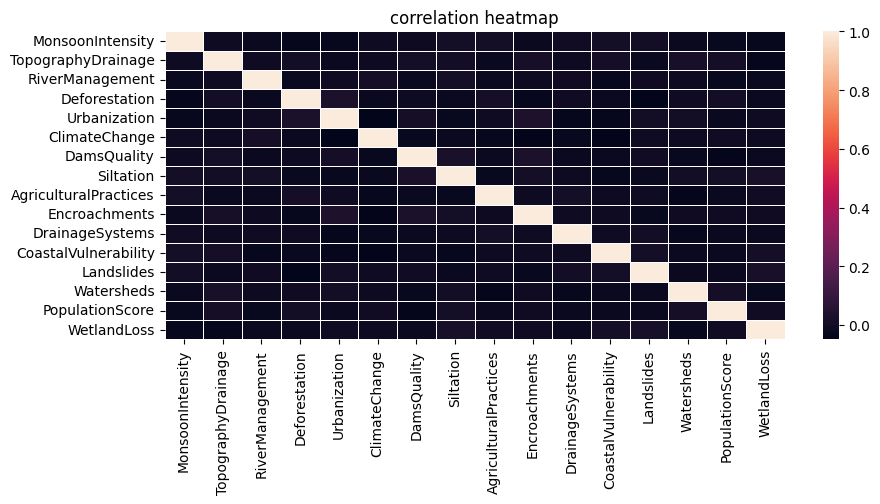

In [ ]:
corr_matrix = df_flood.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr_matrix, fmt=".2f", linewidths=0.5)
plt.title("correlation heatmap")
plt.show()

In [ ]:
df_flood.head

<bound method NDFrame.head of       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0             0.039335            1.467011         0.020654       1.489348   
1             0.525633            0.989450        -0.461971      -0.459918   
2             0.525633            0.034328         0.503280       1.002031   
3            -0.933262           -0.443233         0.503280       0.027398   
4             0.039335           -0.920793        -1.427222       0.514715   
...                ...                 ...              ...            ...   
4016         -0.446964            1.467011         1.468530       1.002031   
4017         -1.419560           -1.875915         0.020654       0.027398   
4018         -1.419560           -0.443233        -0.944596      -0.459918   
4019         -0.446964           -0.443233        -1.427222       1.489348   
4020          0.039335           -0.920793        -1.427222      -0.947235   

      Urbanization  ClimateChange  DamsQuality  Siltation  \
0         0.508518      -0.453698    -0.458827  -0.932697   
1         1.468781       1.489614    -0.938314   0.034964   
2        -0.931878       1.003786    -1.897287   0.034964   
3        -0.451746       1.489614    -0.458827   1.002626   
4        -0.451746      -0.453698    -0.938314  -0.932697   
...            ...            ...          ...        ...   
4016     -0.451746      -0.453698    -0.458827   1.486457   
4017      3.389309      -0.453698     0.020659  -1.416528   
4018     -0.931878       1.489614    -0.458827  -0.932697   
4019     -0.451746      -0.939526    -0.938314   0.034964   
4020           NaN            NaN          NaN        NaN   

      AgriculturalPractices  Encroachments  DrainageSystems  \
0                 -0.938761      -0.456037         0.026184   
1                 -0.455784       0.504258         0.991280   
2                 -0.455784       0.024110         0.991280   
3                  0.510172       1.464552        -1.421459   
4                 -0.938761      -0.936185        -1.421459   
...                     ...            ...              ...   
4016               0.510172      -0.936185        -0.456363   
4017              -0.938761       0.984405         0.991280   
4018               1.476127      -1.896479        -0.938911   
4019              -0.455784       1.464552         1.473828   
4020                    NaN            NaN              NaN   

      CoastalVulnerability  Landslides  Watersheds  PopulationScore  \
0                -0.936056   -0.928460    0.033750         0.999385   
1                -1.414787   -2.371757   -0.926508        -0.929273   
2                -0.936056    0.995936    0.033750         1.481549   
3                -0.457324    0.995936   -0.446379         0.517220   
4                -1.414787    0.514837    0.513878        -1.893602   
...                    ...         ...         ...              ...   
4016              0.021407    0.033738   -0.446379         0.999385   
4017              0.021407    0.033738    1.474136        -2.375766   
4018             -0.457324    0.995936    0.513878        -1.411437   
4019             -0.936056   -1.890658    0.513878        -0.447108   
4020                   NaN         NaN         NaN              NaN   

      WetlandLoss  
0        0.024238  
1       -0.943079  
2       -1.426738  
3        0.024238  
4       -1.426738  
...           ...  
4016    -0.943079  
4017    -1.910396  
4018     1.958873  
4019     0.024238  
4020          NaN  

[4021 rows x 16 columns]>

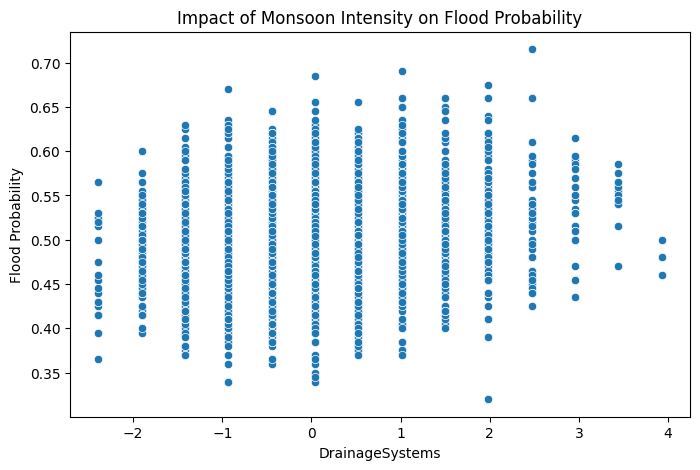

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["MonsoonIntensity"], y=df["FloodProbability"])
plt.xlabel("DrainageSystems")
plt.ylabel("Flood Probability")
plt.title("Impact of Monsoon Intensity on Flood Probability")
plt.show()


In [ ]:
df_flood.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,PopulationScore,WetlandLoss
count,4021.000000,4021.000000,4021.000000,4021.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000
mean,-0.006864,-0.017692,-0.010432,0.008734,0.008201,0.016298,0.008851,-0.025455,-0.014736,0.001297,0.004938,-0.017177,0.020334,-0.009366,-0.000207,0.005831
std,0.989081,0.985763,0.999586,0.984526,0.996147,1.017153,1.008476,0.979308,0.965676,1.001692,0.996092,0.971883,0.995698,1.003103,1.012623,1.003211
min,-2.392157,-2.353476,-2.392472,-2.409185,-2.372274,-2.397010,-2.376773,-2.384190,-2.387694,-2.376627,-2.386555,-2.372250,-2.371757,-2.366894,-2.375766,-2.394055
25%,-0.446964,-0.920793,-0.944596,-0.459918,-0.451746,-0.453698,-0.458827,-0.932697,-0.938761,-0.456037,-0.456363,-0.936056,-0.567636,-0.926508,-0.929273,-0.459420
50%,0.039335,0.034328,0.020654,0.027398,0.028386,0.032130,0.020659,0.034964,0.027194,0.024110,0.026184,0.021407,0.033738,0.033750,0.035056,0.024238
75%,0.525633,0.511889,0.503280,0.514715,0.508518,0.517958,0.500146,0.518795,0.510172,0.504258,0.508732,0.500139,0.514837,0.513878,0.517220,0.507897
max,3.929721,3.377254,4.846908,4.900564,5.309837,4.404583,4.336038,4.389441,4.373993,4.345437,4.369115,4.808722,4.363629,3.874779,3.892371,4.377167


In [ ]:
df_flood.duplicated().sum()

0

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

x = df_flood.drop(columns=["RiverManagement", "Urbanization", "ClimateChange", "PopulationScore"])

X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=42)

model =RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print("MSE", mean_squared_error(Y_test,Y_pred))

MSE 0.001778837151877559


## low mse => model fits well
## checking for overfitting

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test,Y_pred)
print(f'R2 score :{r2}')

R2 score :0.3399582832164548


In [ ]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(Y_train, model.predict(X_train))
test_mse = mean_squared_error(Y_test, Y_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train MSE: 0.0002621391957003622
Test MSE: 0.001778837151877559


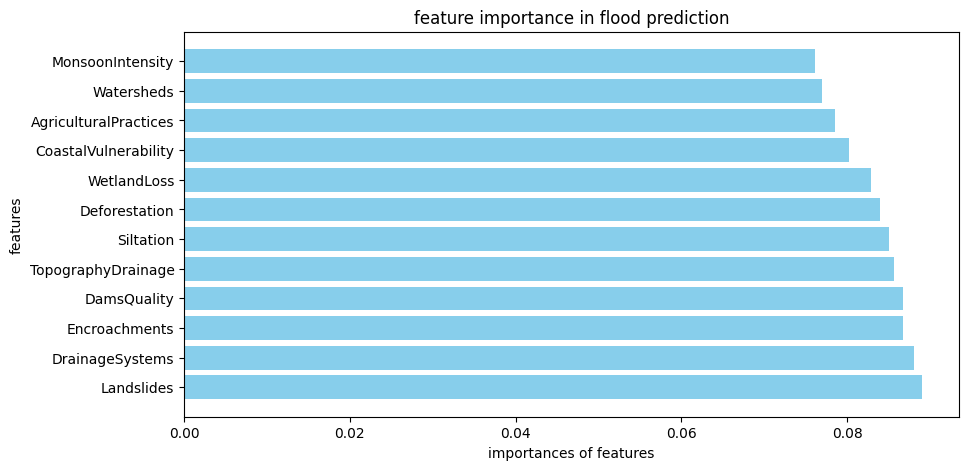

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = model.feature_importances_
features = X_train.columns

sorted_index = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10,5))
plt.barh(np.array(features)[sorted_index],feature_importance[sorted_index],color="skyblue")
plt.xlabel("importances of features")
plt.ylabel("features")
plt.title("feature importance in flood prediction")
plt.show()

## not much overfitting

In [ ]:
df.sum().isnull()

,0
id,False
MonsoonIntensity,False
TopographyDrainage,False
RiverManagement,False
Deforestation,False
...,...
cnt_14,False
cnt_15,False
mmd2,False
mac,False


In [ ]:
x.dropna()

,MonsoonIntensity,TopographyDrainage,Deforestation,DamsQuality,Siltation,AgriculturalPractices,Encroachments,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,WetlandLoss
0,0.039335,1.467011,1.489348,-0.458827,-0.932697,-0.938761,-0.456037,0.026184,-0.936056,-0.928460,0.033750,0.024238
1,0.525633,0.989450,-0.459918,-0.938314,0.034964,-0.455784,0.504258,0.991280,-1.414787,-2.371757,-0.926508,-0.943079
2,0.525633,0.034328,1.002031,-1.897287,0.034964,-0.455784,0.024110,0.991280,-0.936056,0.995936,0.033750,-1.426738
3,-0.933262,-0.443233,0.027398,-0.458827,1.002626,0.510172,1.464552,-1.421459,-0.457324,0.995936,-0.446379,0.024238
4,0.039335,-0.920793,0.514715,-0.938314,-0.932697,-0.938761,-0.936185,-1.421459,-1.414787,0.514837,0.513878,-1.426738
...,...,...,...,...,...,...,...,...,...,...,...,...
4015,0.039335,0.034328,1.002031,-1.417800,2.454118,-0.455784,0.024110,-0.938911,-0.457324,-1.890658,-0.446379,-0.459420
4016,-0.446964,1.467011,1.002031,-0.458827,1.486457,0.510172,-0.936185,-0.456363,0.021407,0.033738,-0.446379,-0.943079
4017,-1.419560,-1.875915,0.027398,0.020659,-1.416528,-0.938761,0.984405,0.991280,0.021407,0.033738,1.474136,-1.910396
4018,-1.419560,-0.443233,-0.459918,-0.458827,-0.932697,1.476127,-1.896479,-0.938911,-0.457324,0.995936,0.513878,1.958873


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=20)),
    ('gb', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05))
]

# Stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=Ridge())
stacking_model.fit(X_train, Y_train)




StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=20,
                                                     n_estimators=200)),
                              ('gb',
                               GradientBoostingRegressor(learning_rate=0.05,
                                                         n_estimators=200))],
                  final_estimator=Ridge())

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.001778837151877559
R-squared: 0.3399582832164548
